# Problem 2

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('insurance_part2_data-2.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.shape

(3000, 10)

In [6]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [7]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
df1['d-type']=df.dtypes
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

,mean,std,min,25%,median,75%,max,range,IQR,CV,mode,d-type
Age,38.09,10.46,8.0,32.0,36.00,42.00,84.00,76.00,10.00,0.27,36,int64
Commision,14.53,25.48,0.0,0.0,4.63,17.24,210.21,210.21,17.24,1.75,0.0,float64
Duration,70.00,134.05,-1.0,11.0,26.50,63.00,4580.00,4581.00,52.00,1.92,8,int64
Sales,60.25,70.73,0.0,20.0,33.00,69.00,539.00,539.00,49.00,1.17,20.0,float64


In [8]:
df.describe(include='object')

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
count,3000,3000,3000,3000,3000,3000
unique,4,2,2,2,5,3
top,EPX,Travel Agency,No,Online,Customised Plan,ASIA
freq,1365,1837,2076,2954,1136,2465


In [9]:
df.isnull().sum().sum()

0

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()


Description of Age
--------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
-------------------------------------


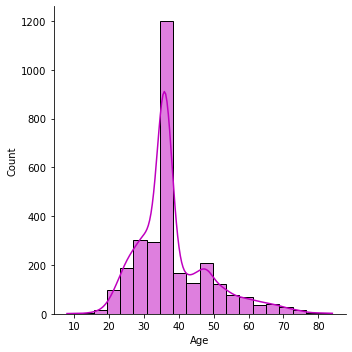

BoxPlot of Age
------------------------------


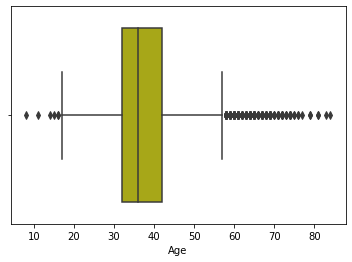

Description of Commision
--------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
-------------------------------------


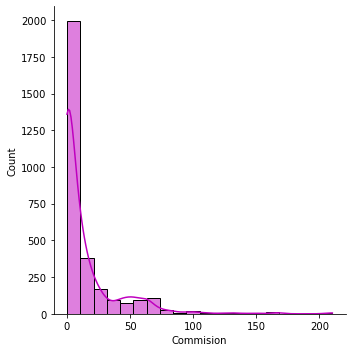

BoxPlot of Commision
------------------------------


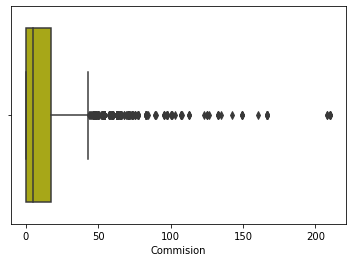

Description of Duration
--------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
-------------------------------------


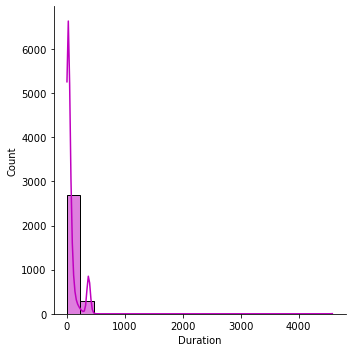

BoxPlot of Duration
------------------------------


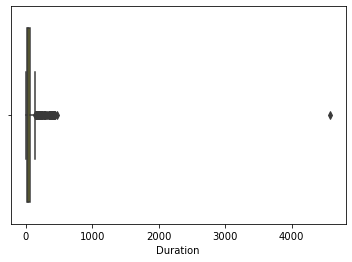

Description of Sales
--------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
-------------------------------------


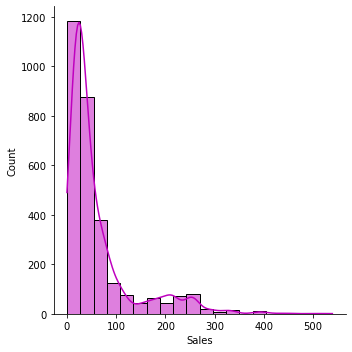

BoxPlot of Sales
------------------------------


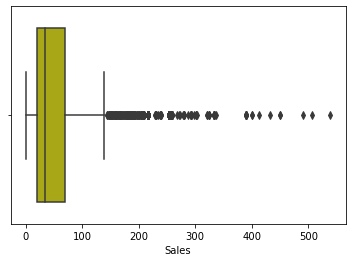

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [13]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

AGENCY_CODE :  4 unique values
--------------------
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

 AGENCY_CODE (normalized)
--------------------
EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64

*************************************************


TYPE :  2 unique values
--------------------
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

 TYPE (normalized)
--------------------
Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64

*************************************************


CLAIMED :  2 unique values
--------------------
No     2076
Yes     924
Name: Claimed, dtype: int64

 CLAIMED (normalized)
--------------------
No     0.692
Yes    0.308
Name: Claimed, dtype: float64

*************************************************


CHANNEL :  2 unique values
--------------------
Online     2954
Offline      46
Name: Channel, dtype: int64

 CHANNEL (normalized

In [14]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),'contains ?: ',(df[column] == '?').sum())
        print(column.upper(),'contains *: ',(df[column] == '*').sum())
        print(column.upper(),'contains %: ',(df[column] == '%').sum())
        print(column.upper(),'contains &: ',(df[column] == '&').sum())
        print('\n*********************************\n')

AGENCY_CODE contains ?:  0
AGENCY_CODE contains *:  0
AGENCY_CODE contains %:  0
AGENCY_CODE contains &:  0

*********************************

TYPE contains ?:  0
TYPE contains *:  0
TYPE contains %:  0
TYPE contains &:  0

*********************************

CLAIMED contains ?:  0
CLAIMED contains *:  0
CLAIMED contains %:  0
CLAIMED contains &:  0

*********************************

CHANNEL contains ?:  0
CHANNEL contains *:  0
CHANNEL contains %:  0
CHANNEL contains &:  0

*********************************

PRODUCT NAME contains ?:  0
PRODUCT NAME contains *:  0
PRODUCT NAME contains %:  0
PRODUCT NAME contains &:  0

*********************************

DESTINATION contains ?:  0
DESTINATION contains *:  0
DESTINATION contains %:  0
DESTINATION contains &:  0

*********************************



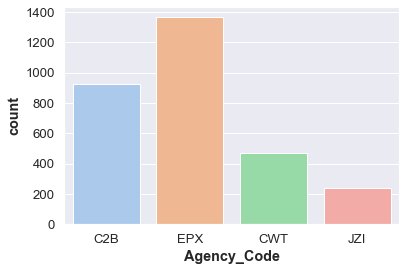

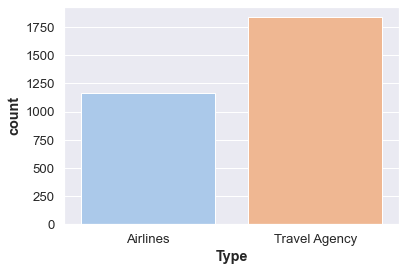

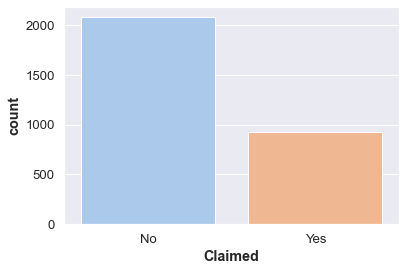

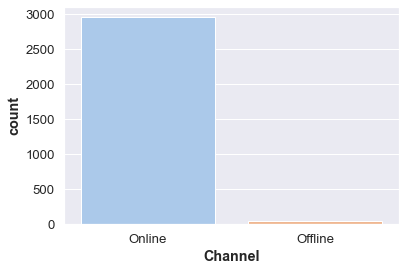

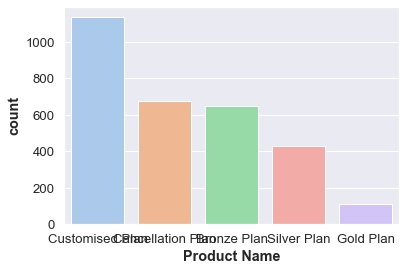

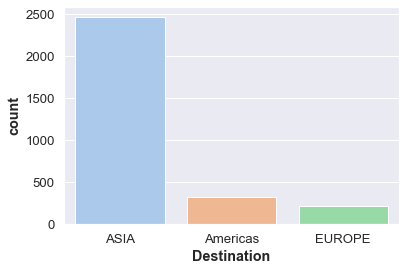

In [15]:
sns.set(font_scale=1.2)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

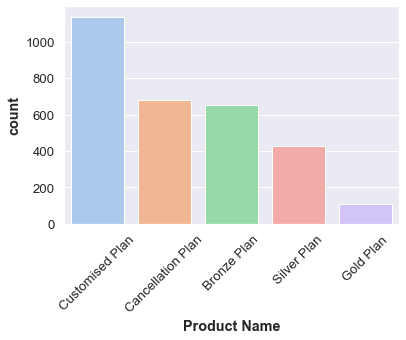

In [16]:
sns.set(font_scale=1.2)
sns.countplot(x='Product Name', data=df, palette='pastel');
plt.ylabel('count',weight="bold")
plt.xlabel('Product Name',weight="bold")
plt.xticks(rotation=45)
plt.show()
sns.set(font_scale=1)

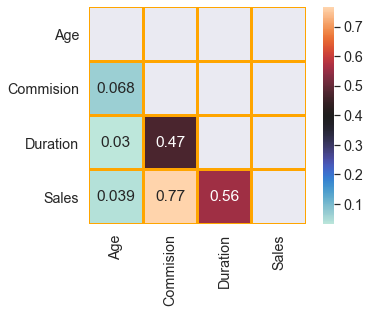

In [17]:
#plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

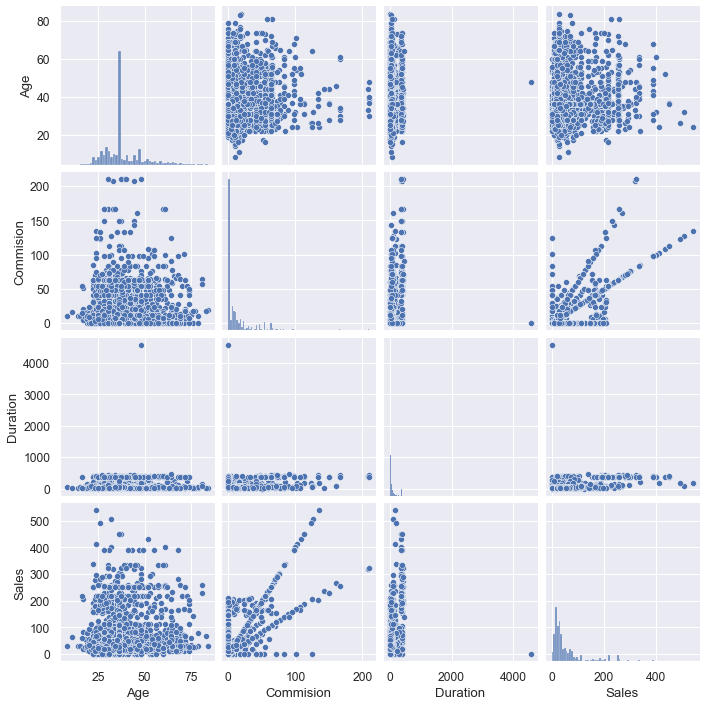

In [18]:
sns.set(font_scale=1.1)
sns.pairplot(df).savefig('out.jpg')
sns.set(font_scale=1)

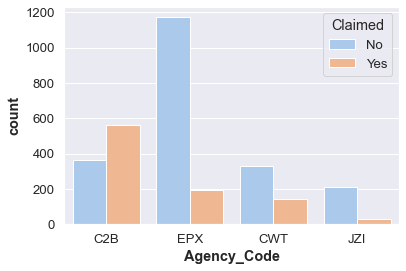

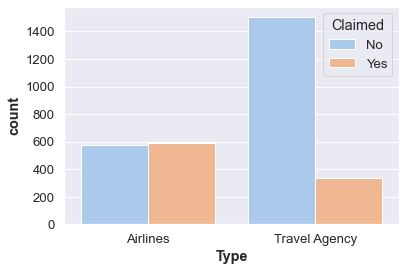

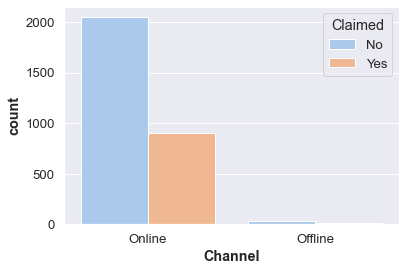

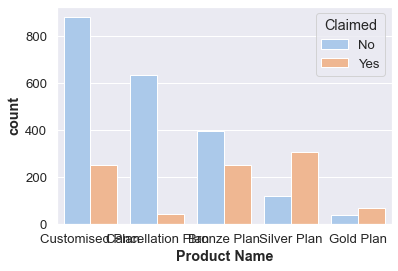

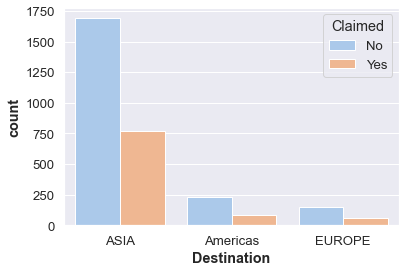

In [19]:
sns.set(font_scale=1.2)
for column in df.drop('Claimed',axis=1).columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, hue='Claimed', palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

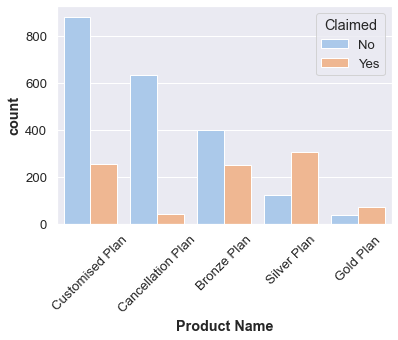

In [20]:
sns.set(font_scale=1.2)
sns.countplot(x='Product Name', data=df, hue='Claimed', palette='pastel')
plt.ylabel('count',weight="bold")
plt.xlabel('Product Name',weight="bold")
plt.xticks(rotation=45)
plt.show()
sns.set(font_scale=1)

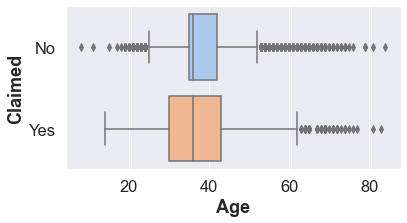

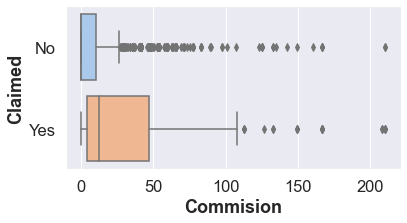

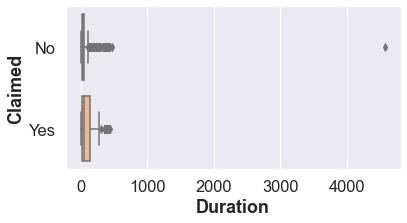

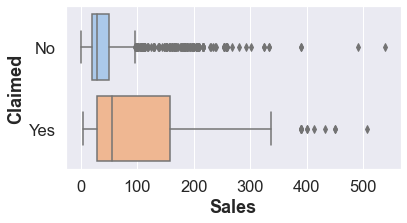

In [21]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='Claimed', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Claimed',weight="bold")
        plt.show()
sns.set(font_scale=1)

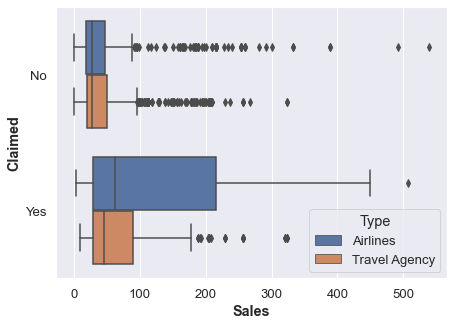

In [22]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
sns.boxplot(y='Claimed', x='Sales', hue='Type',data=df,orient='h',);
plt.xlabel('Sales',weight="bold")
plt.ylabel('Claimed',weight="bold")
sns.set(font_scale=1)

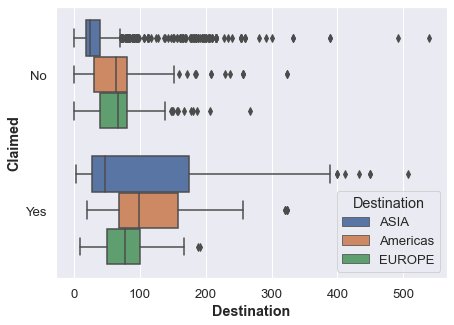

In [23]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
sns.boxplot(y='Claimed', x='Sales', hue='Destination',data=df,orient='h',);
plt.xlabel('Destination',weight="bold")
plt.ylabel('Claimed',weight="bold")
sns.set(font_scale=1)

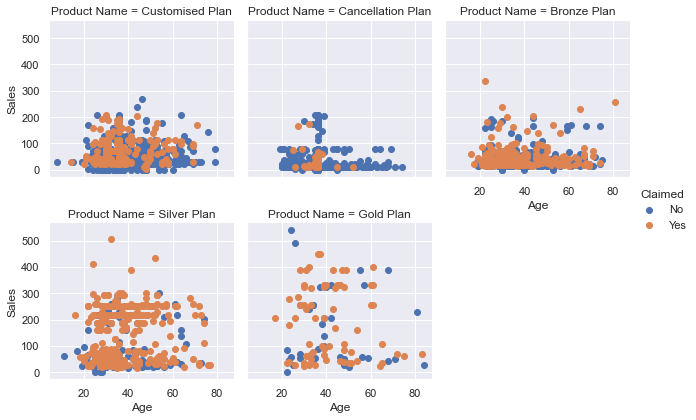

In [24]:
#sns.set(font_scale=1.3)
g = sns.FacetGrid(df, col="Product Name", hue='Claimed',col_wrap=3, height=3)
g = g.map(plt.scatter, "Age", 'Sales')
g.add_legend()
sns.set(font_scale=1)

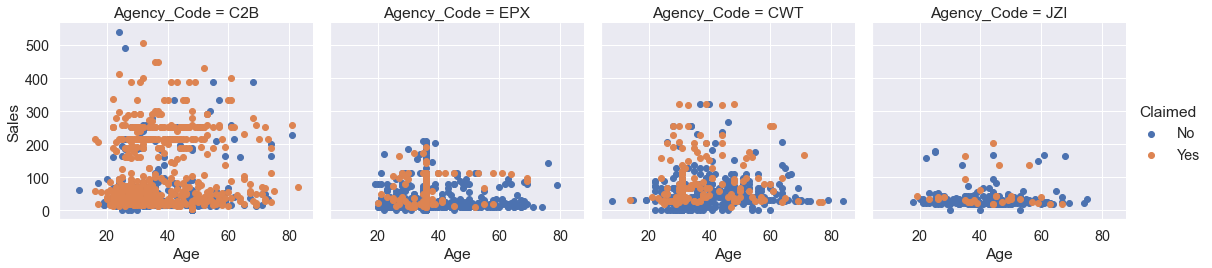

In [25]:
sns.set(font_scale=1.3)
g = sns.FacetGrid(df, col="Agency_Code", hue='Claimed',col_wrap=4, height=4)
g = g.map(plt.scatter, "Age", 'Sales')
g.add_legend()
sns.set(font_scale=1)

In [26]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('For feature "',feature,'":')
        print(sorted(pd.Categorical(df[feature].unique())))
        print(sorted(pd.Categorical(df[feature].unique()).codes))
        df[feature]=pd.Categorical(df[feature]).codes



For feature " Agency_Code ":
['C2B', 'CWT', 'EPX', 'JZI']
[0, 1, 2, 3]


For feature " Type ":
['Airlines', 'Travel Agency']
[0, 1]


For feature " Claimed ":
['No', 'Yes']
[0, 1]


For feature " Channel ":
['Offline', 'Online']
[0, 1]


For feature " Product Name ":
['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[0, 1, 2, 3, 4]


For feature " Destination ":
['ASIA', 'Americas', 'EUROPE']
[0, 1, 2]


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [28]:
print('Before Removing: ',df.shape)
df=df.drop(["Channel"],axis=1) 
print('After Removing: ',df.shape)

Before Removing:  (3000, 10)
After Removing:  (3000, 9)


In [29]:
df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [30]:
X = df.drop('Claimed', axis=1)

y = df.pop('Claimed')

## Splitting data into training and test set

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Checking the dimensions of the training and test data

In [32]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('train_labels:',train_labels.shape)
print('test_labels:',test_labels.shape)

X_train: (2100, 8)
X_test: (900, 8)
train_labels: (2100,)
test_labels: (900,)


# Building a Decision Tree Classifier

In [33]:
param_grid = {
    'criterion': ['gini'],  #'entropy'
    'max_depth': [6],   # 7,8,9,10,11,12,13,14,20,25
    'min_samples_leaf': [25],   # 100,150
    'min_samples_split': [300],   # 100,50,150,450
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10, scoring='recall')

In [34]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 25, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=6, min_samples_leaf=25, min_samples_split=300,
                       random_state=1)

## Generating Tree

In [35]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [36]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.612973
Sales         0.255277
Product Name  0.078296
Commision     0.023067
Duration      0.017598
Age           0.012790
Type          0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [37]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [38]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [39]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.887805,0.112195
1,0.432432,0.567568
2,0.432432,0.567568
3,0.238908,0.761092
4,0.937500,0.062500


In [40]:
#pred12 = pd.DataFrame(ytest_predict_prob)
#predclass = np.where(pred12[1]> 0.25, 1, 0)
#predclass

## Model Evaluation

### AUC and ROC for the training data

AUC: 0.829


Text(0, 0.5, 'True Positive Rate')

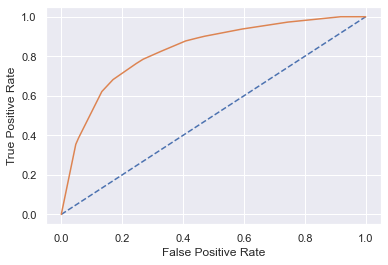

In [41]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### AUC and ROC for the test data

AUC: 0.798


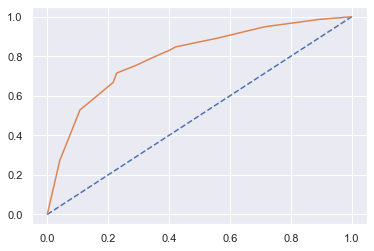

In [42]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [43]:
confusion_matrix(train_labels, ytrain_predict)

array([[1275,  196],
       [ 238,  391]], dtype=int64)

In [44]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7933333333333333

In [45]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [46]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.62
cart_train_f1  0.64


### Confusion Matrix for test data

In [47]:
confusion_matrix(test_labels, ytest_predict)

array([[540,  65],
       [139, 156]], dtype=int64)

In [48]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7733333333333333

In [49]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [50]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.53
cart_test_f1  0.6


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 85%        
    Accuracy: 75%             
    Precision: 84%        
    f1-Score: 81%       
            
<b>Test Data:</b>      
    AUC: 84%      
    Accuracy: 74%         
    Precision: 84%       
    f1-Score: 81%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Change is the most important variable for predicting diabetes

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [51]:
param_grid = {
    'max_depth': [8],  # 10,12,15,20,25
    'max_features': [5], # 4,6
    'min_samples_leaf': [35], # 50,100
    'min_samples_split': [60], # 70,100
    'n_estimators': [151] ## 101,201
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5, scoring='recall')

In [52]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8], 'max_features': [5],
                         'min_samples_leaf': [35], 'min_samples_split': [60],
                         'n_estimators': [151]},
             scoring='recall')

In [53]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 35,
 'min_samples_split': 60,
 'n_estimators': 151}

In [54]:
best_grid = grid_search.best_estimator_

In [55]:
best_grid

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=35,
                       min_samples_split=60, n_estimators=151, random_state=1)

## Variable Importance

In [56]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.411305
Product Name  0.197230
Sales         0.183358
Commision     0.095024
Duration      0.052580
Age           0.035067
Type          0.021373
Destination   0.004063


## Predicting the Training and Testing data

In [57]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [58]:
confusion_matrix(train_labels,ytrain_predict)

array([[1325,  146],
       [ 265,  364]], dtype=int64)

In [59]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [60]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1471
           1       0.71      0.58      0.64       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [61]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.58
rf_train_f1  0.64


Area under Curve is 0.8481998013529185


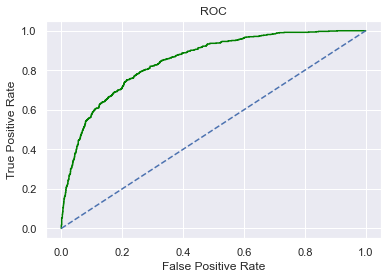

In [62]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [63]:
confusion_matrix(test_labels,ytest_predict)

array([[551,  54],
       [154, 141]], dtype=int64)

In [64]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7688888888888888

In [65]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [66]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.48
rf_test_f1  0.58


Area under Curve is 0.8183022832329457


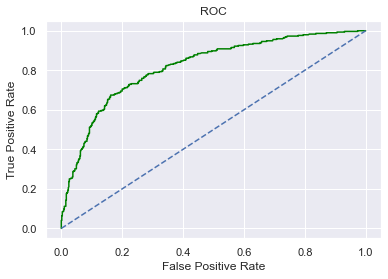

In [67]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [68]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.411305
Product Name  0.197230
Sales         0.183358
Commision     0.095024
Duration      0.052580
Age           0.035067
Type          0.021373
Destination   0.004063


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 87%        
    Accuracy: 77%           
    Precision: 88%        
    f1-Score: 82%       
            
<b>Test Data:</b>      
    AUC: 85%      
    Accuracy: 75%          
    Precision: 86%       
    f1-Score: 80%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Change is again the most important variable for predicting diabetes

# Building a Neural Network Classifier

In [69]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

In [70]:
param_grid = {
    'hidden_layer_sizes': [4],   # 3,4,5,6,7,8,9,10,11,12,15,20,50,100,70,72,75,79,81,83,87,90,[4,4],[5,5],[4,5],[5,4],[5,3,2]
    'max_iter': [2500], # 2000,3000,5000
    'solver': ['adam'], #sgd
    'tol': [0.001], # 0.0001
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5, scoring='recall')

In [71]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 4, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.001}

In [72]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=4, max_iter=2500, random_state=1, tol=0.001)

## Predicting the Training and Testing data

In [73]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [74]:
confusion_matrix(train_labels,ytrain_predict)

array([[1198,  273],
       [ 248,  381]], dtype=int64)

In [75]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7519047619047619

In [76]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1471
           1       0.58      0.61      0.59       629

    accuracy                           0.75      2100
   macro avg       0.71      0.71      0.71      2100
weighted avg       0.75      0.75      0.75      2100



In [77]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.58
nn_train_recall  0.61
nn_train_f1  0.59


Area under Curve is 0.8001429869906697


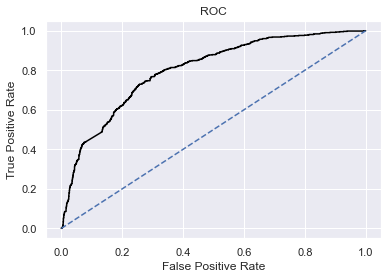

In [78]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [79]:
confusion_matrix(test_labels,ytest_predict)

array([[522,  83],
       [148, 147]], dtype=int64)

In [80]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7433333333333333

In [81]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       605
           1       0.64      0.50      0.56       295

    accuracy                           0.74       900
   macro avg       0.71      0.68      0.69       900
weighted avg       0.73      0.74      0.73       900



In [82]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.5
nn_test_f1  0.56


Area under Curve is 0.7903683989354252


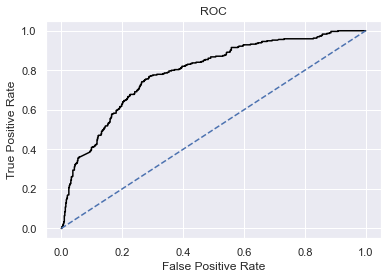

In [83]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [84]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=4, max_iter=2500, random_state=1, tol=0.001)>

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 84%        
    Accuracy: 73%          
    Precision: 87%        
    f1-Score: 78%     
            
<b>Test Data:</b>      
    AUC: 84%      
    Accuracy: 73%        
    Precision: 87%       
    f1-Score: 78%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [85]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.80,0.77,0.75,0.74
AUC,0.83,0.80,0.85,0.82,0.80,0.79
Recall,0.62,0.53,0.58,0.48,0.61,0.50
Precision,0.67,0.71,0.71,0.72,0.58,0.64
F1 Score,0.64,0.60,0.64,0.58,0.59,0.56


## ROC Curve for the 3 models on the Training data

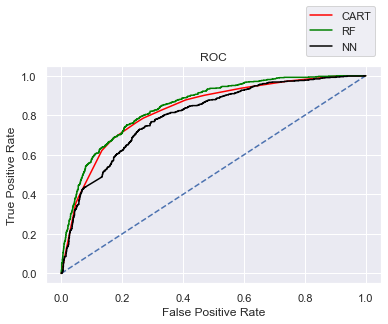

In [86]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

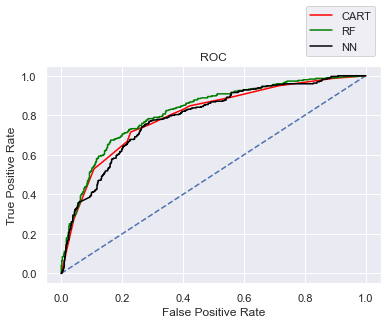

In [87]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a person has diabetes or not. If change is yes, then those patients have more chances of getting diabetes.